# 1. Data Understanding

Pada bagian ini, kita akan melakukan eksplorasi data untuk memahami struktur dan informasi yang terkandung dalam dataset **Pima Indians Diabetes Database**. Dataset ini berisi data medis yang digunakan untuk memprediksi apakah seorang pasien memiliki diabetes berdasarkan hasil pemeriksaan medis.

## Informasi Dataset
Dataset ini memiliki 768 sampel data, masing-masing dengan 8 fitur (kolom) yang menggambarkan informasi medis, serta satu kolom target yang menunjukkan apakah pasien tersebut positif diabetes (1) atau tidak (0).

Fitur-fitur yang terdapat dalam dataset ini adalah:
1. **Pregnancies**: Jumlah kehamilan
2. **Glucose**: Konsentrasi glukosa plasma
3. **BloodPressure**: Tekanan darah diastolik
4. **SkinThickness**: Ketebalan kulit
5. **Insulin**: Konsetrasi insulin serum
6. **BMI**: Indeks Massa Tubuh
7. **DiabetesPedigreeFunction**: Fungsi silsilah diabetes
8. **Age**: Umur dalam tahun
9. **Outcome**: 0 jika tidak diabetes, 1 jika diabetes (target)

## Tujuan Eksplorasi
Eksplorasi data ini bertujuan untuk:
1. Mengetahui apakah ada nilai yang hilang (missing values) dalam dataset.
2. Mengetahui apakah ada data duplikat dalam dataset.
3. Memahami distribusi fitur-fitur numerik.
4. Mengecek apakah ada nilai outlier dalam dataset

Sekarang, kita akan mulai dengan melihat sekilas struktur dataset dan statistik deskriptif untuk mendapatkan pemahaman dasar.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Import Library

Pada cell ini, dilakukan proses import berbagai library yang dibutuhkan untuk menjalankan proyek machine learning:

- **pandas**: Untuk memproses dan memanipulasi data dalam bentuk DataFrame.
- **matplotlib.pyplot** & **seaborn**: Untuk membuat visualisasi data (grafik, histogram, heatmap, dll).
- **numpy**: Digunakan untuk operasi numerik dan array multidimensi.

Dari modul *scikit-learn*:
- **train_test_split**: Membagi dataset menjadi data latih dan data uji.
- **StandardScaler**: Melakukan normalisasi/standardisasi fitur numerik.
- **LogisticRegression, RandomForestClassifier, SVC**: Algoritma machine learning yang digunakan untuk klasifikasi.
- **accuracy_score, precision_score, recall_score, f1_score, confusion_matrix**: Berbagai metrik evaluasi performa model klasifikasi.

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Tampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset Info

Pada tahap pertama, kita mengecek informasi dasar mengenai dataset. Dataset ini terdiri dari 768 entri dan 9 kolom. Semua kolom tidak mengandung nilai yang hilang. Tipe data untuk mayoritas kolom adalah integer, kecuali kolom **DiabetesPedigreeFunction**, yang memiliki tipe data float.

Kolom-kolom dataset ini terdiri dari:
- **Pregnancies**
- **Glucose**
- **BloodPressure**
- **SkinThickness**
- **Insulin**
- **BMI**
- **DiabetesPedigreeFunction**
- **Age**
- **Outcome** (Target)

In [3]:
# Tampilkan beberapa baris pertama untuk melihat struktur data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Tampilan Data

Di atas adalah beberapa baris pertama dari dataset. Dari data yang ditampilkan, kita dapat melihat variabel numerik yang menggambarkan informasi medis seperti jumlah kehamilan, kadar glukosa, tekanan darah, dan faktor lainnya yang digunakan untuk memprediksi diabetes.

Beberapa contoh data yang ditampilkan adalah:
- Pasien 1 memiliki 6 kehamilan, kadar glukosa 148, dan usia 50 tahun, serta hasil diagnosis positif diabetes.
- Pasien 2 memiliki 1 kehamilan, kadar glukosa 85, dan usia 31 tahun, serta hasil diagnosis negatif diabetes.

In [4]:
# Statistik deskriptif untuk fitur numerik
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Statistik Deskriptif

Tabel statistik deskriptif memberikan gambaran mengenai distribusi fitur numerik dalam dataset. Beberapa informasi yang menarik dari statistik deskriptif ini adalah:
- Kolom **Glucose** memiliki nilai rata-rata sekitar 120, dengan nilai minimum 0 yang menunjukkan kemungkinan adanya data yang perlu ditangani (misalnya, nilai 0 bisa berarti data hilang atau tidak valid).
- Kolom **Insulin** juga memiliki nilai minimum 0, yang menunjukkan adanya kemungkinan nilai 0 pada data yang memerlukan penanganan khusus.
- Kolom **BMI** memiliki rata-rata sekitar 31, dengan nilai maksimum hingga 67, yang menunjukkan rentang variasi yang cukup besar dalam data.

Beberapa fitur perlu dinormalisasi agar tidak menimbulkan bias.

In [5]:
# Mengecek missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Cek Missing Values

Hasil pengecekan missing values menunjukkan bahwa tidak ada nilai yang hilang pada dataset ini. Semua kolom memiliki 768 entri non-null, yang berarti kita tidak perlu melakukan penanganan terhadap missing values pada tahap ini.

 Tidak ada missing values dalam dataset ini, seperti yang telah diverifikasi sebelumnya. Semua kolom memiliki 768 entri non-null.

In [6]:
# Menampilkan jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Menampilkan baris-baris duplikat
duplikat = df[df.duplicated()]
print("Baris duplikat:")
print(duplikat)

Jumlah baris duplikat: 0
Baris duplikat:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Dapat dilihat bahwa dataset yang dipakai pada proyek saat ini tidak mengandung data duplikat. Sehingga tahapan proyek dapat dilanjutkan ke tahap pengecekan distribusi data dan pengecekan nilai outlier

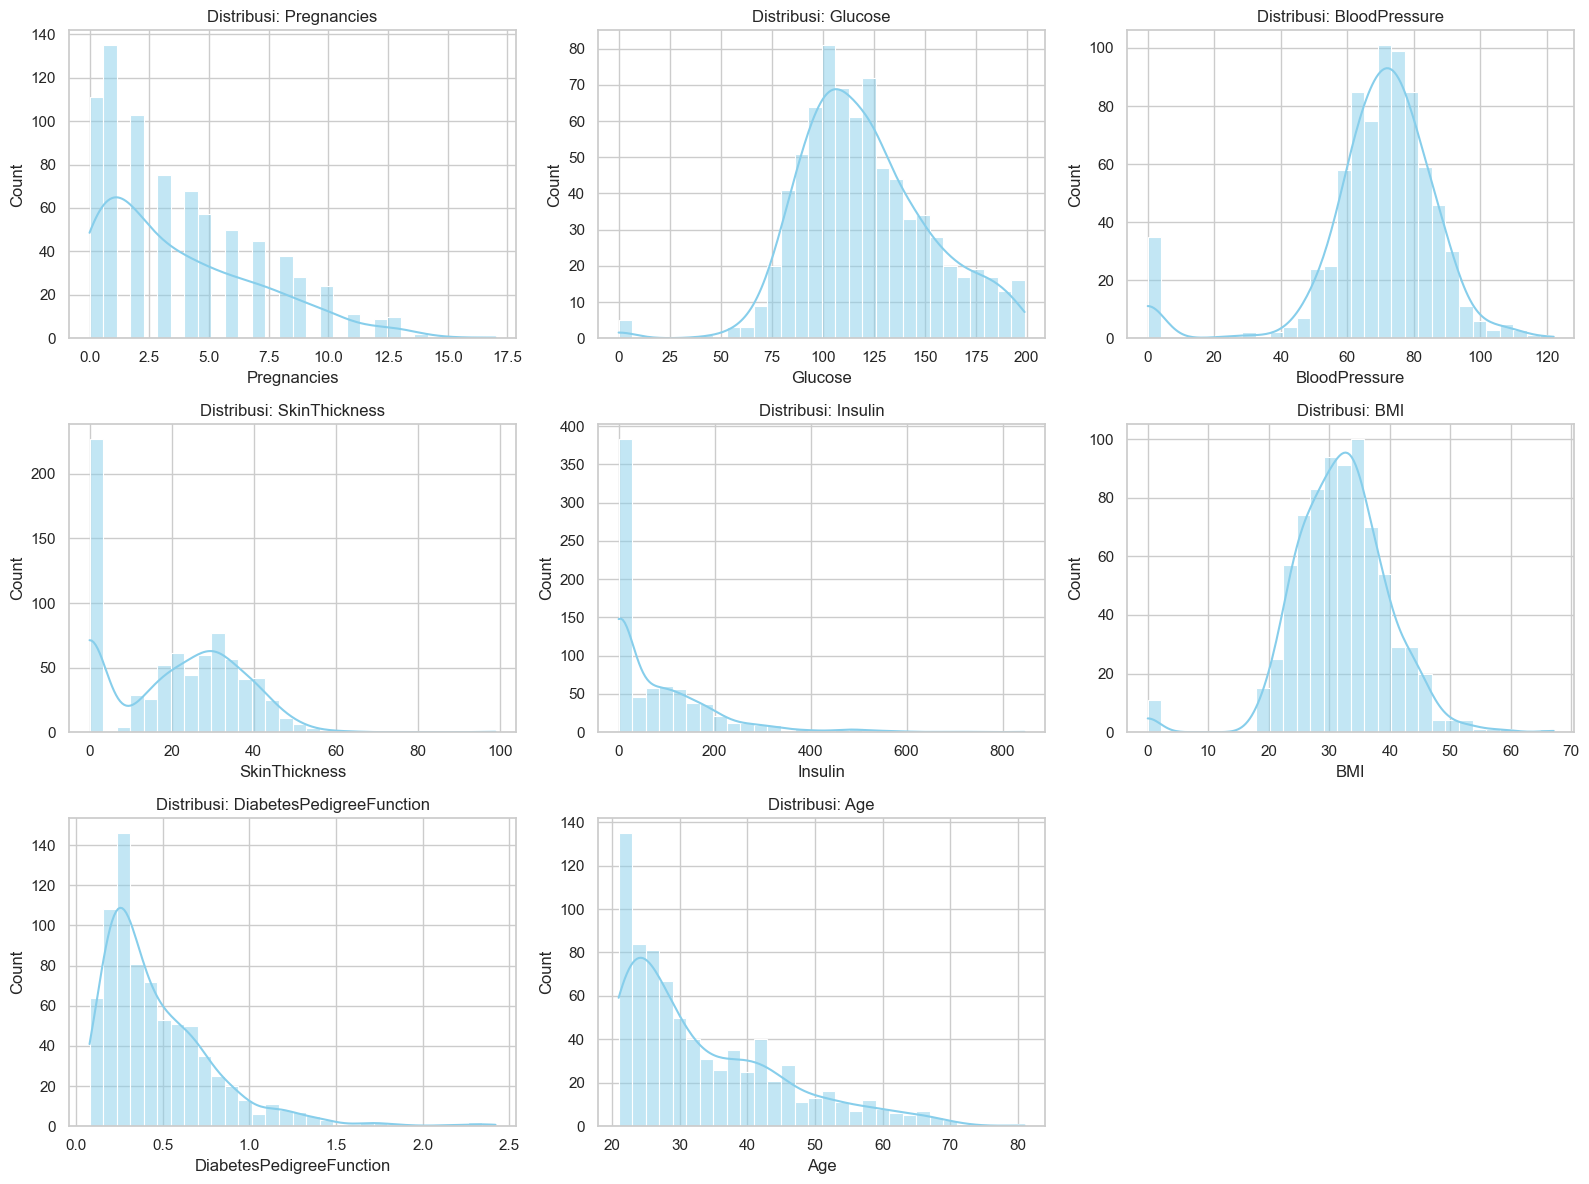

In [7]:
# Ambil data sebelum normalisasi, tanpa kolom target
features = df.drop(columns=['Outcome'])

# Set style visualisasi
sns.set(style="whitegrid")

# Visualisasi distribusi setiap fitur numerik sebelum normalisasi
plt.figure(figsize=(16, 12))
for i, col in enumerate(features.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=features, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

Distribusi Setiap Fitur (Histogram + KDE)
- Beberapa fitur seperti **Pregnancies**, **Insulin**, **DiabetesPedigreeFunction**, dan **Age** memiliki distribusi yang miring ke kanan (positively skewed).
- **Glucose**, **BloodPressure**, dan **BMI** cenderung memiliki distribusi mendekati normal.

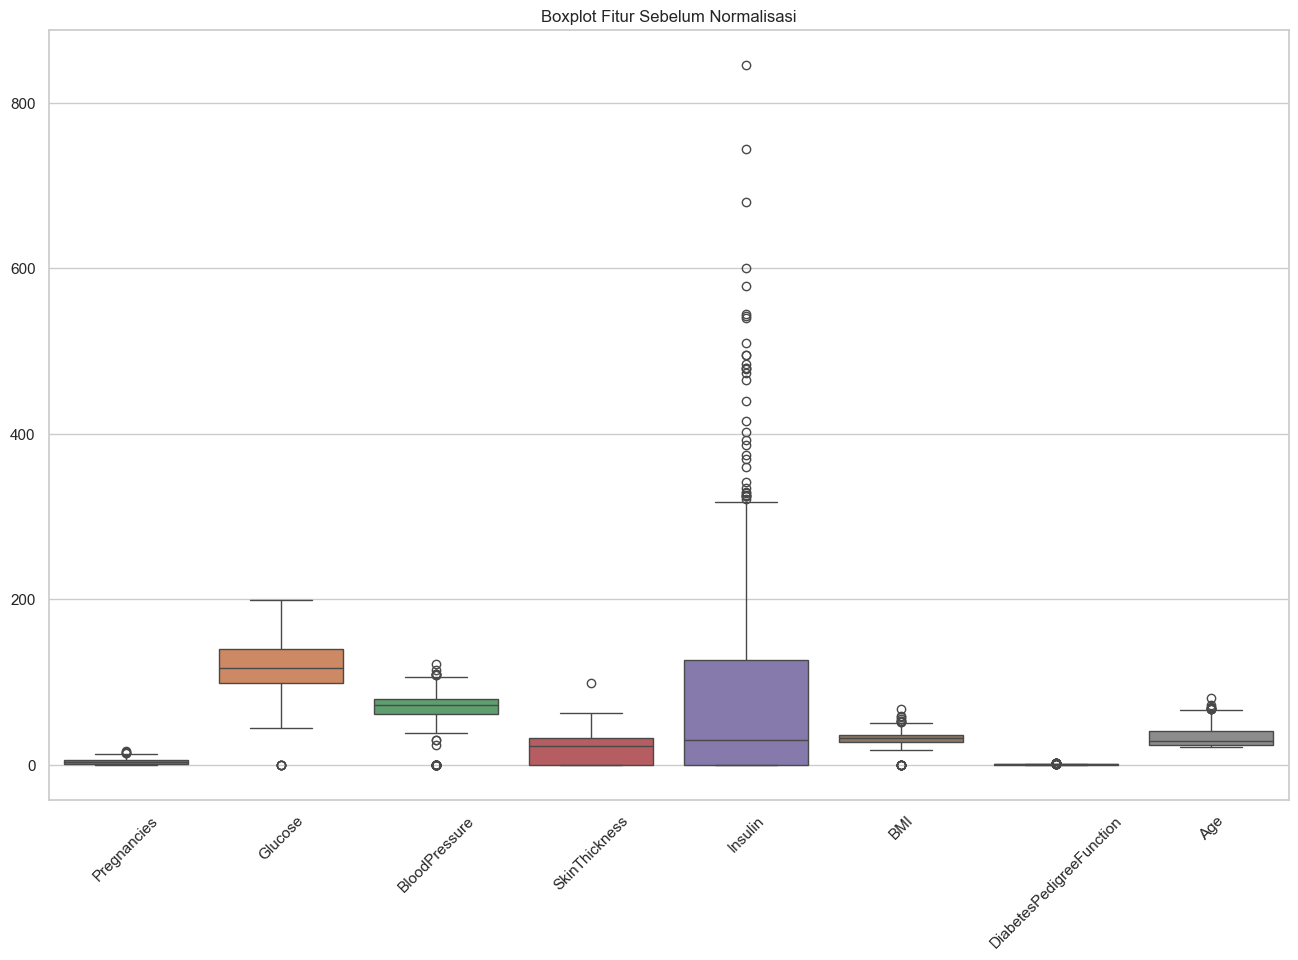

In [8]:
# Boxplot untuk melihat outlier
plt.figure(figsize=(16, 10))
sns.boxplot(data=features)
plt.title("Boxplot Fitur Sebelum Normalisasi")
plt.xticks(rotation=45)
plt.show()

Boxplot Fitur Sebelum Normalisasi
- Terlihat jelas adanya **outlier ekstrem**, terutama pada fitur **Insulin**, **SkinThickness**, dan sebagian pada **BMI**. Namun, karena proyek ini berfokus pada deteksi dini diabetes, data dengan nilai ekstrem tersebut tetap dipertahankan karena dapat merepresentasikan kasus medis yang valid dan signifikan (contoh: kadar insulin sangat tinggi).
- Rentang data sangat bervariasi, sehingga normalisasi diperlukan untuk memastikan model machine learning tidak bias terhadap fitur dengan skala besar.


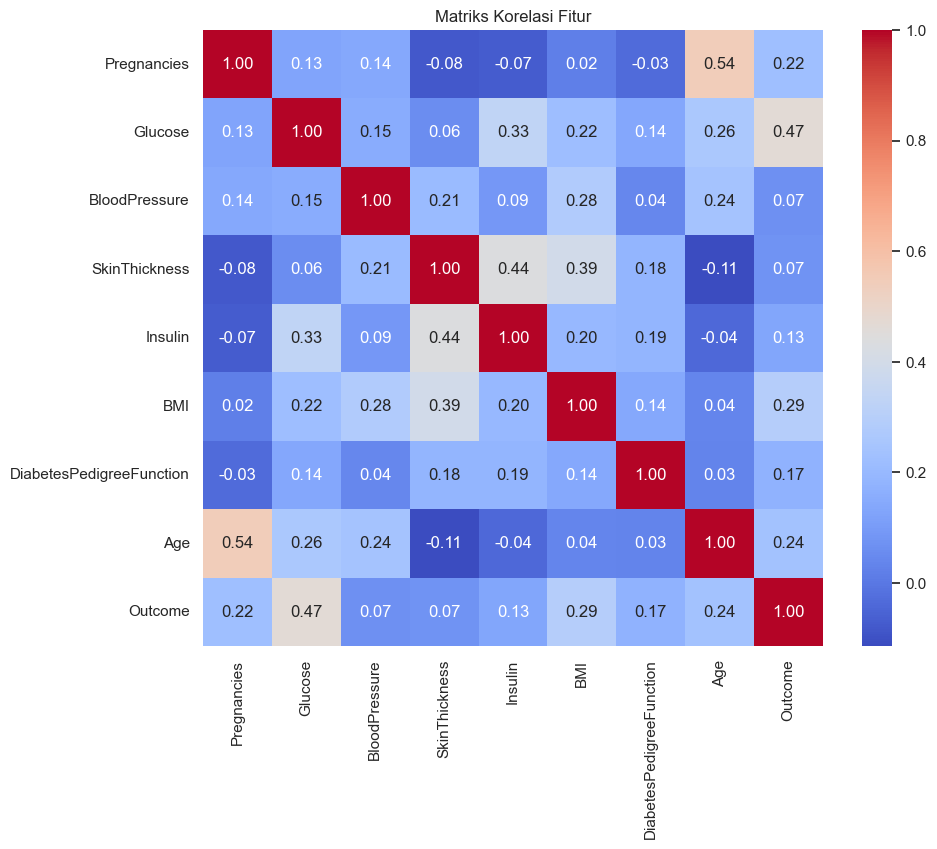

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

Matriks Korelasi
- Fitur **Glucose** memiliki korelasi paling tinggi terhadap target `Outcome` (**r = 0.47**), menunjukkan bahwa kadar glukosa darah sangat mempengaruhi klasifikasi diabetes.
- **BMI** dan **Age** juga memiliki korelasi sedang terhadap `Outcome`.
- Sebagian besar fitur lainnya menunjukkan korelasi rendah satu sama lain, mengindikasikan rendahnya multikolinearitas.


In [10]:
# Normalisasi Data
scaler = StandardScaler()

Setelah normalisasi, semua fitur numerik diubah sehingga memiliki mean = 0 dan standar deviasi = 1. Ini penting agar model machine learning dapat mengolah data dengan lebih baik, terutama untuk algoritma yang sensitif terhadap skala fitur, seperti **Logistic Regression** atau **K-Nearest Neighbors**.

In [11]:
# Kolom fitur yang perlu dinormalisasi (kecuali kolom target 'Outcome')
features = df.drop(columns=['Outcome'])

Seleksi Fitur

Memisahkan kolom fitur dari target (`Outcome`) agar dapat dilakukan proses normalisasi hanya pada fitur input.

In [12]:
# Normalisasi fitur
scaled_features = scaler.fit_transform(features)

Normalisasi Fitur

Melakukan standardisasi fitur numerik menggunakan `StandardScaler` agar semua fitur berada dalam skala yang sama (mean = 0, std = 1).

In [13]:
# Menyusun DataFrame baru setelah normalisasi
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

Menyusun DataFrame Ternormalisasi

Mengubah hasil normalisasi (array) menjadi DataFrame dengan kolom yang sama seperti fitur asli.

In [14]:
# Menambahkan kolom target 'Outcome'
scaled_df['Outcome'] = df['Outcome']

Menambahkan Kolom Target

Menambahkan kembali kolom `Outcome` (target klasifikasi) ke dalam DataFrame yang sudah dinormalisasi.

In [15]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Setelah normalisasi menggunakan **StandardScaler**, semua fitur numerik dalam dataset, seperti **Glucose**, **Insulin**, dan **BMI**, kini berada dalam rentang yang lebih seragam dengan nilai rata-rata 0 koma sekian dan standar deviasi 1. Proses ini memastikan bahwa fitur yang sebelumnya memiliki skala yang sangat bervariasi kini berada pada skala yang konsisten, sehingga model machine learning dapat memproses data dengan lebih efisien tanpa terpengaruh oleh perbedaan skala antar fitur. Kolom target **Outcome** tetap berada pada nilai asli (0 atau 1), karena ini adalah variabel kategorikal.

In [16]:
# Pemisahan Data menjadi Training dan Test Set
X = scaled_df.drop(columns=['Outcome'])  # Fitur
y = scaled_df['Outcome']  # Target

Pemisahan Fitur dan Target

Memisahkan variabel fitur (`X`) dan target (`y`) dari DataFrame yang sudah dinormalisasi untuk persiapan training dan evaluasi model.

In [17]:
# Membagi data menjadi 80% training dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi 80% data latih dan 20% data uji. Data latih digunakan untuk membangun model, sementara data uji digunakan untuk mengevaluasi kinerja model. Pembagian ini memastikan bahwa model dapat diuji dengan data yang tidak pernah dilihat sebelumnya, memberikan gambaran yang lebih akurat tentang kemampuan generalisasi model.

In [18]:
# Menampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape[0]} | Ukuran data uji: {X_test.shape[0]}")

Ukuran data latih: 614 | Ukuran data uji: 154


Menampilkan Ukuran Data Latih dan Uji

Menampilkan jumlah sampel pada data latih dan data uji untuk memastikan pemisahan dataset berjalan sesuai proporsi.

# 3. Modeling

Pada tahap ini, kita akan membangun dan membandingkan beberapa model machine learning untuk menyelesaikan masalah klasifikasi, yaitu memprediksi apakah seseorang mengidap diabetes berdasarkan fitur-fitur input dalam dataset.

### Pemilihan Model
Untuk memberikan hasil yang optimal dan memenuhi prinsip _solution statement_, kita akan membandingkan performa dari tiga algoritma klasifikasi yang umum digunakan dan efektif dalam domain kesehatan:

- **Logistic Regression**: Algoritma dasar yang sederhana dan mudah diinterpretasikan.
- **Random Forest**: Algoritma ensemble yang kuat terhadap overfitting dan cocok untuk data tabular.
- **Support Vector Machine (SVM)**: Algoritma dengan margin maksimum yang efektif dalam kasus klasifikasi biner.

Pemilihan lebih dari satu model ini bertujuan untuk menentukan pendekatan terbaik dalam mendeteksi diabetes secara dini.

### Training Model
Setiap model akan dilatih menggunakan data latih (`X_train` dan `y_train`) yang telah diproses pada tahap sebelumnya. Pelatihan ini dilakukan secara terpisah untuk memastikan setiap model diberi kesempatan yang adil dalam mempelajari pola dari data.

### Evaluasi Model
Setelah pelatihan, model akan diuji menggunakan data uji (`X_test`) dan dievaluasi menggunakan metrik sebagai berikut:

- **Accuracy**: Persentase prediksi yang benar terhadap seluruh data uji.
- **Precision**: Kemampuan model dalam mengklasifikasikan kasus positif (diabetes) dengan benar.
- **Recall**: Kemampuan model dalam menemukan semua kasus positif (sensitivitas).
- **F1-Score**: Harmonic mean dari precision dan recall, cocok untuk data yang imbalanced.

Hasil evaluasi dari ketiga model akan dibandingkan dalam bentuk tabel dan grafik untuk memudahkan pemilihan model terbaik.

In [19]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

Inisialisasi Model

Membuat tiga model klasifikasi yang akan digunakan: Logistic Regression, Random Forest, dan SVM, masing-masing dengan parameter dasar dan `random_state=42` untuk reproduktibilitas.

In [20]:
# Dictionary untuk menyimpan hasil evaluasi
results = {}
conf_matrices = {}

Inisialisasi Tempat Penyimpanan Hasil

Membuat dictionary `results` untuk menyimpan metrik evaluasi, dan `conf_matrices` untuk menyimpan confusion matrix dari setiap model.

In [21]:
# Melatih dan evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1]
    conf_matrices[name] = cm

Pelatihan dan Evaluasi Model

Melatih setiap model pada data latih, lalu melakukan prediksi pada data uji.  
Setelah itu, dihitung metrik evaluasi (accuracy, precision, recall, dan F1-score) serta confusion matrix untuk setiap model, dan disimpan ke dalam dictionary.

In [22]:
# Menampilkan metrik evaluasi dalam tabel
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("Evaluasi Metrik Setiap Model:")
display(metrics_df.T)

Evaluasi Metrik Setiap Model:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.753247,0.649123,0.672727,0.660714
Random Forest,0.727273,0.618182,0.618182,0.618182
SVM,0.727273,0.632653,0.563636,0.596154


Menampilkan Tabel Evaluasi

Mengubah hasil evaluasi dari semua model menjadi DataFrame, lalu menampilkannya dalam bentuk tabel agar mudah dibandingkan.

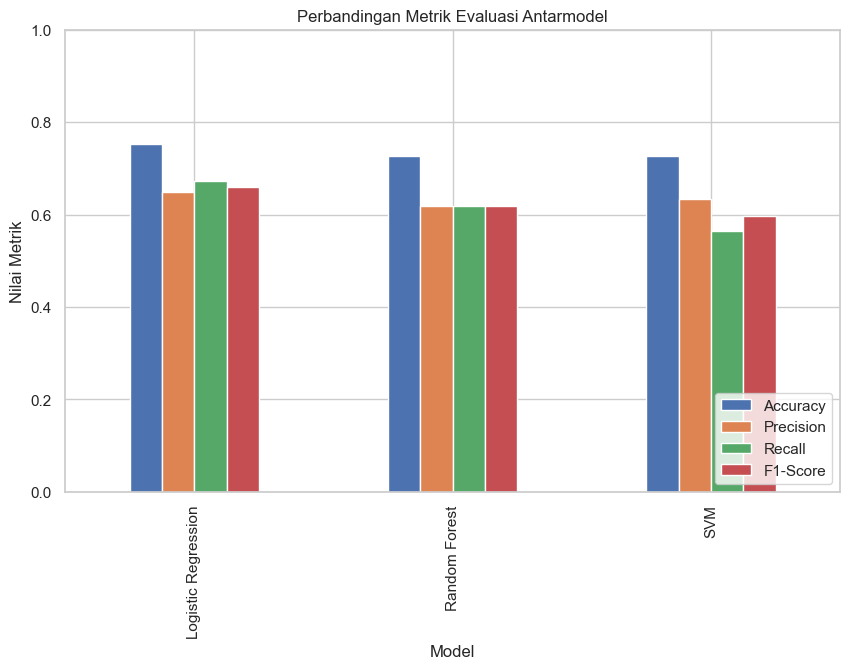

In [23]:
# Visualisasi perbandingan metrik
metrics_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Perbandingan Metrik Evaluasi Antarmodel")
plt.xlabel("Model")
plt.ylabel("Nilai Metrik")
plt.ylim(0, 1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

Visualisasi Perbandingan Metrik

Menampilkan grafik batang untuk membandingkan nilai metrik evaluasi (Accuracy, Precision, Recall, F1-Score) dari setiap model secara visual.

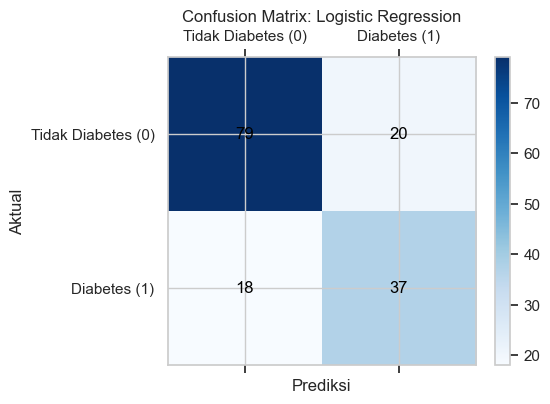

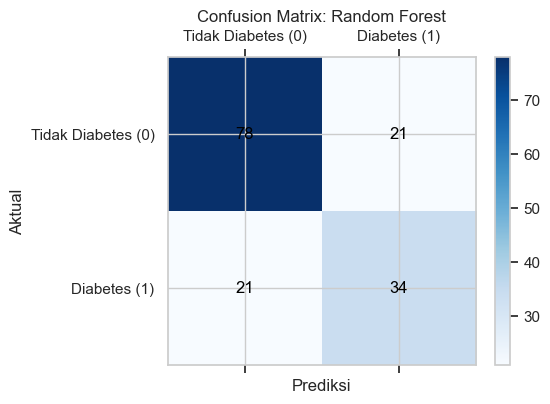

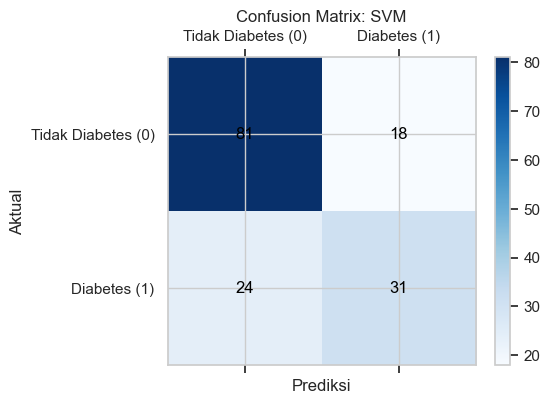

In [24]:
# Visualisasi confusion matrix untuk tiap model
for name, cm in conf_matrices.items():
    fig, ax = plt.subplots(figsize=(5, 4))
    cax = ax.matshow(cm, cmap='Blues')
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.xticks([0, 1], ['Tidak Diabetes (0)', 'Diabetes (1)'])
    plt.yticks([0, 1], ['Tidak Diabetes (0)', 'Diabetes (1)'])
    plt.colorbar(cax)
    plt.show()

Visualisasi Confusion Matrix

Menampilkan confusion matrix untuk masing-masing model untuk melihat jumlah prediksi benar dan salah pada masing-masing kelas (positif dan negatif diabetes).

**Hasil Evaluasi Model**

Setelah melatih ketiga model — **Logistic Regression**, **Random Forest**, dan **Support Vector Machine (SVM)** — kami melakukan evaluasi terhadap kinerja masing-masing menggunakan empat metrik utama: Accuracy, Precision, Recall, dan F1-Score. Berikut adalah hasil evaluasi lengkap:

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | **0.753** | **0.649**   | **0.673** | **0.661**  |
| Random Forest       | 0.727    | 0.618     | 0.618  | 0.618    |
| SVM                 | 0.727    | 0.633     | 0.564  | 0.596    |

**Interpretasi Hasil**

- **Logistic Regression** menunjukkan performa terbaik di antara ketiga model pada semua metrik evaluasi utama. Model ini mencapai **akurasi tertinggi sebesar 75.32%**, serta memiliki **precision, recall, dan F1-score** yang lebih baik dibandingkan Random Forest dan SVM.
- Model ini memiliki **64.91% precision**, yang berarti sekitar 65% dari semua kasus yang diprediksi sebagai diabetes benar-benar positif.
- Dengan **67.27% recall**, model berhasil mendeteksi sebagian besar pasien yang benar-benar mengidap diabetes.
- F1-score sebesar **66.07%** mengindikasikan keseimbangan yang baik antara precision dan recall.

**Confusion Matrix**

Model Logistic Regression menghasilkan confusion matrix sebagai berikut:

- **Benar Negatif (True Negative)**: 79 kasus tidak diabetes diklasifikasikan dengan benar.
- **Benar Positif (True Positive)**: 37 kasus diabetes diklasifikasikan dengan benar.
- **False Positive**: 20 kasus tidak diabetes yang salah diklasifikasikan sebagai diabetes.
- **False Negative**: 18 kasus diabetes yang salah diklasifikasikan sebagai tidak diabetes.

**Kesimpulan**

Berdasarkan hasil evaluasi, **Logistic Regression dipilih sebagai model terbaik** untuk kasus ini karena memiliki performa paling seimbang dan konsisten di seluruh metrik. Meskipun masih ada ruang untuk perbaikan, terutama dalam hal false negative, model ini memberikan dasar yang kuat dan dapat ditingkatkan lebih lanjut dengan teknik tuning atau ensemble di masa depan.

Data Pasien (Input Baru):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            2      172             73             22      235   37   

   DiabetesPedigreeFunction  Age  
0                         0   71  

Hasil Prediksi: Diabetes (1)
Probabilitas Keyakinan Model: 0.8790

Indikator Risiko Diabetes:
  - Kadar glukosa tinggi.
  - BMI menunjukkan obesitas.
  - Usia di atas 45 tahun.


/Users/ivanbesti/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivanbesti/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


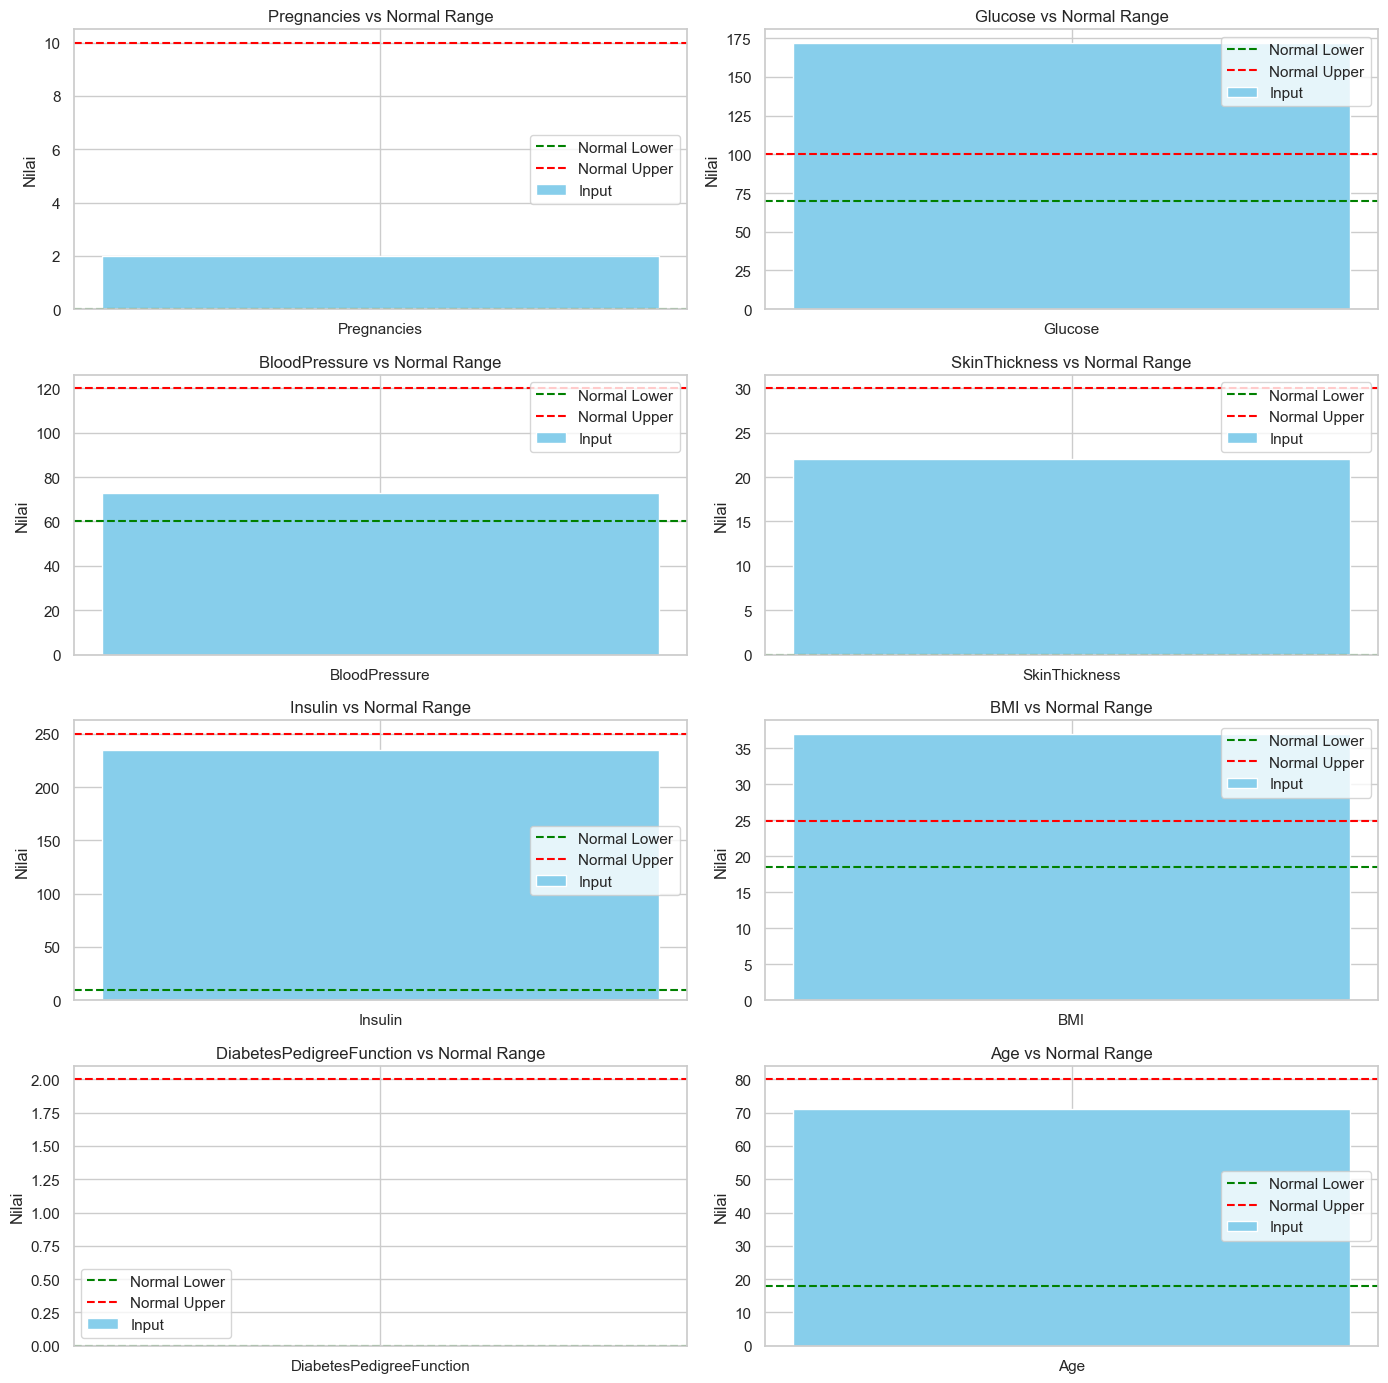

In [27]:
# ========================
# INFERENSI DATA BARU
# ========================

# Data acak realistis (simulasi input pasien)
new_data = np.random.randint(
    [0, 50, 50, 10, 10, 18, 0, 18], 
    [15, 200, 120, 80, 300, 50, 2, 80], 
    size=(1, 8)
)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
new_data_df = pd.DataFrame(new_data, columns=columns)

print("Data Pasien (Input Baru):")
print(new_data_df)

# Normalisasi menggunakan scaler yang telah dilatih sebelumnya
new_data_scaled = scaler.transform(new_data_df)

# Menggunakan model terbaik hasil evaluasi (Logistic Regression)
best_model = models["Logistic Regression"]
prediction = best_model.predict(new_data_scaled)
prediction_prob = best_model.predict_proba(new_data_scaled)

# Interpretasi Hasil
if prediction[0] == 1:
    prediction_result = "Diabetes (1)"
    prediction_probability = prediction_prob[0][1]
else:
    prediction_result = "Tidak Diabetes (0)"
    prediction_probability = prediction_prob[0][0]

print(f"\nHasil Prediksi: {prediction_result}")
print(f"Probabilitas Keyakinan Model: {prediction_probability:.4f}")

# Analisis Fitur Risiko
if prediction[0] == 1:
    print("\nIndikator Risiko Diabetes:")
    if new_data_df['Glucose'][0] > 140:
        print("  - Kadar glukosa tinggi.")
    if new_data_df['BMI'][0] > 30:
        print("  - BMI menunjukkan obesitas.")
    if new_data_df['Age'][0] > 45:
        print("  - Usia di atas 45 tahun.")
    if new_data_df['DiabetesPedigreeFunction'][0] > 0.5:
        print("  - Ada faktor genetik (riwayat keluarga).")
else:
    print("\nIndikator Risiko Tidak Diabetes:")
    print("  - Semua fitur berada dalam rentang yang wajar.")

# Visualisasi nilai input vs batas normal
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
axes = axes.flatten()

normal_limits = {
    'Glucose': [70, 100],
    'BMI': [18.5, 24.9],
    'Age': [18, 80],
    'Pregnancies': [0, 10],
    'BloodPressure': [60, 120],
    'SkinThickness': [0, 30],
    'Insulin': [10, 250],
    'DiabetesPedigreeFunction': [0, 2]
}

for i, feature in enumerate(columns):
    ax = axes[i]
    ax.bar(feature, new_data_df[feature][0], color='skyblue', label='Input')
    low, high = normal_limits[feature]
    ax.axhline(y=low, color='green', linestyle='--', label='Normal Lower')
    ax.axhline(y=high, color='red', linestyle='--', label='Normal Upper')
    ax.set_title(f"{feature} vs Normal Range")
    ax.set_ylabel("Nilai")
    ax.legend()

plt.tight_layout()
plt.show()

### Insight

Model menunjukkan performa yang solid dalam mendeteksi kemungkinan **diabetes** berdasarkan data medis pasien yang diinputkan. Pada inferensi ini, model memberikan probabilitas sebesar **87.90%** bahwa individu ini **mengidap diabetes** (**Prediksi: Diabetes**), menunjukkan tingkat keyakinan yang cukup tinggi.

Analisis terhadap fitur-fitur medis pasien mengungkapkan adanya beberapa faktor risiko signifikan yang mendukung hasil prediksi:

- **Kadar glukosa darah tinggi** (151 mg/dL), melampaui batas normal (≤140 mg/dL), menjadi salah satu indikator utama diabetes.
- **BMI melampaui batas normal**, yang menunjukkan obesitas parah dan merupakan faktor risiko kuat untuk diabetes tipe 2.
- **Usia di atas 45** usia di atas 45 tahun memperkuat indikasi diabetes.

Pasien dengan usia di atas 45 tahun, lalu kombinasi dari kadar glukosa tinggi, obesitas, dan faktor genetik memberikan dasar yang kuat bagi model untuk mengklasifikasikan individu ini sebagai berisiko tinggi terhadap diabetes. Dengan demikian, prediksi model tidak hanya didasarkan pada perhitungan statistik, tetapi juga selaras dengan pertimbangan klinis yang relevan.